In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor


In [2]:
Df = pd.read_csv("C:\\Users\\Admin\\Downloads\\vidya\\comRF.csv")

In [3]:
Df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
Df.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [5]:
Df.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
390,5.47,108,75,9,61,111,Medium,67,12,Yes,Yes
391,6.10,153,63,0,49,124,Bad,56,16,Yes,No
392,4.53,129,42,13,315,130,Bad,34,13,Yes,Yes
393,5.57,109,51,10,26,120,Medium,30,17,No,Yes
394,5.35,130,58,19,366,139,Bad,33,16,Yes,Yes
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [6]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
Df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
Df.isna().sum()


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
Df.shape

(400, 11)

In [10]:
Df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot:ylabel='Count'>

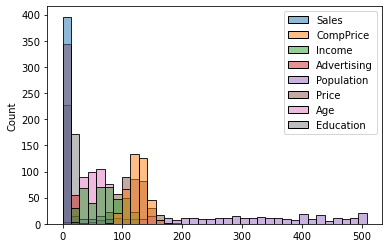

In [11]:
sns.histplot(Df)

In [12]:
print(Df.ShelveLoc.value_counts())

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [13]:
print(Df.Urban.value_counts())


Yes    282
No     118
Name: Urban, dtype: int64


In [14]:
print(Df.US.value_counts())


Yes    258
No     142
Name: US, dtype: int64


In [15]:
# Converting Catagorical Variables by Using Map Function
Df["ShelveLoc"]= Df["ShelveLoc"].map({"Bad":0, "Medium":1, "Good":2})
Df["Urban"]= Df["Urban"].map({"No":0, "Yes":1})
Df["US"]= Df["US"].map({"No":0, "Yes":1})

In [16]:
Df.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
5,10.81,124,113,13,501,72,0,78,16,0,1
6,6.63,115,105,0,45,108,1,71,15,1,0
7,11.85,136,81,15,425,120,2,67,10,1,1
8,6.54,132,110,0,108,124,1,76,10,0,0
9,4.69,132,113,0,131,124,1,76,17,0,1


In [17]:
print(Df.ShelveLoc.value_counts())

1    219
0     96
2     85
Name: ShelveLoc, dtype: int64


In [18]:
print(Df.Urban.value_counts())


1    282
0    118
Name: Urban, dtype: int64


In [19]:
print(Df.US.value_counts())

1    258
0    142
Name: US, dtype: int64


In [20]:
X= Df.drop("Sales", axis=1)
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [21]:
y= pd.cut(Df.Sales, bins=[-1, 10, 17], labels=[0,1])
y

0      0
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    0
Name: Sales, Length: 400, dtype: category
Categories (2, int64): [0 < 1]

In [22]:
y.value_counts()


0    322
1     78
Name: Sales, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
#Applying random forest on splitted data


In [25]:
model = RandomForestClassifier(n_estimators=150,random_state=42,max_features=0.9)
model.fit(x_train, y_train)


RandomForestClassifier(max_features=0.9, n_estimators=150, random_state=42)

In [26]:
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.8916666666666667

In [27]:
confusion_matrix(y_test,y_pred)


array([[90,  6],
       [ 7, 17]], dtype=int64)

In [28]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.93      0.94      0.93        96
           1       0.74      0.71      0.72        24

    accuracy                           0.89       120
   macro avg       0.83      0.82      0.83       120
weighted avg       0.89      0.89      0.89       120



In [29]:
#Using Cross Validation


In [30]:
skfold= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
scores = cross_val_score(model, X, y, cv=skfold, scoring="accuracy")


In [31]:
print(scores)


[0.825  0.85   0.8875 0.875  0.9    0.8625 0.875  0.8125 0.8875 0.85
 0.825  0.8625 0.9    0.9125 0.85   0.825  0.8625 0.8375 0.8875 0.85
 0.8375 0.825  0.8625 0.85   0.8625 0.9125 0.7875 0.85   0.8875 0.8625
 0.85   0.85   0.8875 0.9    0.9125 0.9    0.875  0.85   0.8625 0.9125
 0.9125 0.875  0.8625 0.85   0.875  0.8375 0.8875 0.825  0.8625 0.9   ]


In [32]:
np.mean(scores)


0.86525

In [33]:
np.max

<function numpy.amax(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>

In [34]:
np.max(scores)

0.9125

In [35]:
np.min(scores)

0.7875

In [36]:
#Apply Random Forest Regression


In [37]:
model1= RandomForestRegressor()
model1.fit(x_train, y_train)


RandomForestRegressor()

In [38]:
y_pred1 = model.predict(x_test)
model.score(x_test, y_test)


0.8916666666666667

In [39]:
confusion_matrix(y_test, y_pred1)


array([[90,  6],
       [ 7, 17]], dtype=int64)

In [ ]:
#Using AdaBoost


In [40]:
from sklearn.ensemble import AdaBoostClassifier


In [41]:
model3= AdaBoostClassifier(base_estimator=model, n_estimators= 200, random_state=42)
model3.fit(x_train, y_train)


AdaBoostClassifier(base_estimator=RandomForestClassifier(max_features=0.9,
                                                         n_estimators=150,
                                                         random_state=42),
                   n_estimators=200, random_state=42)

In [42]:
y_pred3 = model3.predict(x_test)
model3.score(x_test, y_test)

0.9

In [43]:
confusion_matrix(y_test, y_pred3)


array([[91,  5],
       [ 7, 17]], dtype=int64)

In [44]:
print(classification_report(y_test, y_pred3))


              precision    recall  f1-score   support

           0       0.93      0.95      0.94        96
           1       0.77      0.71      0.74        24

    accuracy                           0.90       120
   macro avg       0.85      0.83      0.84       120
weighted avg       0.90      0.90      0.90       120

